<a href="https://colab.research.google.com/github/CriticalDatathon/team-7/blob/main/workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 1️⃣ EDA & Study Design

**🎨 Team 7**


**👥 Authors**


* Charles
* Chenyu
* Ikakke
* Shyla
* Joey
* Pedro
* Peter

**🎯 Goals of this Workshop**
1. Define Inclusion Criteria to build a working cohort
2. Explore the Ground-Truths, present in the data set


**✏️ Expected Deliverables**
1. Flow chart with inclusion and exclusion criteria, reporting who's being left out, by demographics
2. Define the Machine Learning Task to be addressed



**❗ Highlighted Pitfall(s)**
* Sampling and Representation Bias

## 0. Understand the Problem and Dataset

Please go through [Workshop 0](https://colab.research.google.com/gist/joamats/08338a27a51c02179f3d5e8b8f15cecb/workshop_0.ipynb) for an Introduction on the Problem, Dataset and Objective of the Datathon. As the Datathon schedule is very tight, this should be studied prior to attending the Event.


## 1. Inclusion/exclusion Criteria Definition

In discussion between Data Scientists and Clinicians, try to answer these questions:
* What is a reasonable $SaO_2$ and $SpO_2$ cut-off value to avoid aberrant values and venous blood gas value?
* What is a reasonable time offset between $SaO_2$ and $SpO_2$ to create a pair?
* Are there patients from any demographics or with certain comorbidities that should not be included?
* Is there any specific treatment information that may influence?
* How to deal with multiple pairs per patient?


When taking these decisions, keep these into consideration:
* Are we keeping a reasonable amount of patients?
* What are the consequences of these decisions if we were to implement the result of this project in a real setting?
* Are we seggregating any group of patients?
* Are there groups that are more likely to be dropped in any approach and could introduce sampling selection bias?


### ✏️ Discussed Criteria
`Fill in with the ones you come up with as a team `

* SaO2 cutoff below <88% and SpO2 Value above >92% for aberrent pairs

* SaO2 range( 0-100%) SpO2 range(0-100%) deleted all extreme numbers 
* SaO2 and SpO2 differences Typically the discrepancy between SaO2 and SpO2 is about 2% to 3% https://www.hamilton-medical.com/en_US/Resource-center/Article-page~knowledge-base~1ca65f7a-dd26-4d83-a415-bc7377a4bec3~.html#:~:text=Typically%20the%20discrepancy%20between%20SaO2,Pulse%20oximetry.

* SaO2>=70 SpO2>=88

## 2. Study Cohort Creation

**What is a Flowchart in this context?**

A Flowchart reflects the study cohort creation, by selecting the patients that best suit our study design.

It is a helpful tool to visualize the numbers after applying our inclusion and exclusion criteria.

**Example (part of one):**

<div>
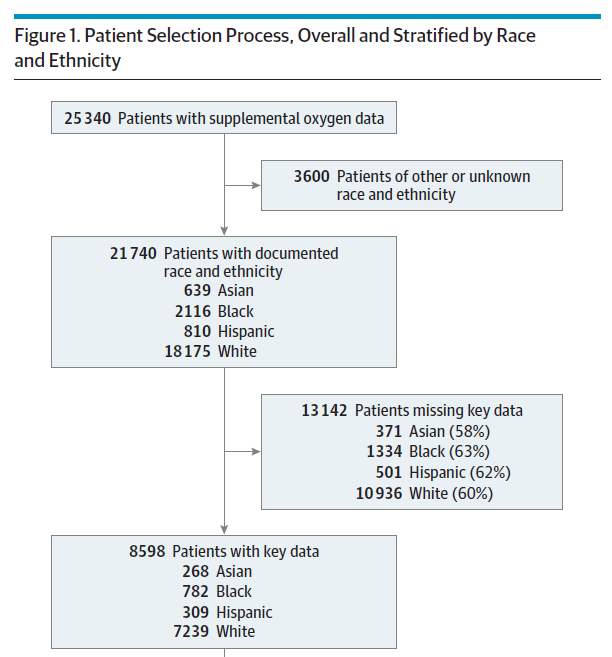
</div>

**Source:**
Gottlieb ER, Ziegler J, Morley K, Rush B, Celi LA. Assessment of Racial and Ethnic Differences in Oxygen Supplementation Among Patients in the Intensive Care Unit. JAMA Intern Med. 2022;182(8):849–858. https://doi:10.1001/jamainternmed.2022.2587

### ✏️ Initial Exploratory Data Analysis (EDA)

`Create code below to answer the following questions`



How many patients do we have per racial-ethnic group, sex, and other demographics?

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MIT_Datathon_2023

/content/drive/MyDrive/MIT_Datathon_2023


In [ ]:
# cd '/drive/MyDrive/MIT_Datathon_2023'/
# https://drive.google.com/file/d/1VVurzB5-b4qKyzCOzD_ePjgGxPthO4F3/view?usp=share_link

!gdown 1VVurzB5-b4qKyzCOzD_ePjgGxPthO4F3

Downloading...
From: https://drive.google.com/uc?id=1VVurzB5-b4qKyzCOzD_ePjgGxPthO4F3
To: /content/drive/MyDrive/MIT_Datathon_2023/mimic_pulseOx_data.csv
100% 52.5M/52.5M [00:01<00:00, 32.2MB/s]


In [ ]:
# df = pd.read_csv("/content/mimic_pulseOx_data.csv")


In [ ]:
 import pandas as pd

# Load the data
data = pd.read_csv("mimic_pulseOx_data.csv")

# Number of patients per racial-ethnic group
race_counts = data['race_group'].value_counts()
print("Number of patients per racial-ethnic group:")
print(race_counts)

# Number of patients per sex
sex_counts = data['gender'].value_counts()
print("\nNumber of patients per sex:")
print(sex_counts)

# Other demographic information
# Age distribution
age_counts = data['anchor_age'].value_counts()
print("\nAge distribution:")
print(age_counts)


# Number of patients per racial-ethnic group
race_counts = data['race_group'].value_counts()
print("Number of patients per racial-ethnic group:")
print(race_counts)

# Number of patients per race
race_counts = data['race'].value_counts()
print("\nNumber of patients per race:")
print(race_counts)

# Number of patients per language
language_counts = data['language'].value_counts()
print("\nNumber of patients per language:")
print(language_counts)

# Number of patients per insurance type
insurance_counts = data['insurance'].value_counts()
print("\nNumber of patients per insurance type:")
print(insurance_counts)

# Weight distribution
weight_counts = data['weight'].value_counts(bins=10)  # Change the number of bins as needed
print("\nWeight distribution:")
print(weight_counts)

# Height distribution
height_counts = data['height'].value_counts(bins=10)  # Change the number of bins as needed
print("\nHeight distribution:")
print(height_counts)

# BMI distribution
bmi_counts = data['BMI'].value_counts(bins=10)  # Change the number of bins as needed
print("\nBMI distribution:")
print(bmi_counts)

Number of patients per racial-ethnic group:
White       55206
Other       15892
Black        5644
Hispanic     2821
Asian        2234
Name: race_group, dtype: int64

Number of patients per sex:
M    52894
F    28903
Name: gender, dtype: int64

Age distribution:
72    3020
67    2881
70    2793
71    2392
64    2373
      ... 
26      95
20      68
19      61
21      40
18      17
Name: anchor_age, Length: 73, dtype: int64
Number of patients per racial-ethnic group:
White       55206
Other       15892
Black        5644
Hispanic     2821
Asian        2234
Name: race_group, dtype: int64

Number of patients per race:
WHITE                                        52033
UNKNOWN                                      10519
BLACK/AFRICAN AMERICAN                        4821
OTHER                                         2462
WHITE - OTHER EUROPEAN                        2063
UNABLE TO OBTAIN                              1783
HISPANIC/LATINO - PUERTO RICAN                1029
ASIAN - CHINESE       

What is the $SaO_2$ / $SpO_2$ measurement values range?


In [ ]:
# Code here!

# Range of SaO2 values
saO2_min = data['SaO2'].min()
saO2_max = data['SaO2'].max()
print("Range of SaO2 values: ", saO2_min, " to ", saO2_max)

# Range of SpO2 values
spO2_min = data['SpO2'].min()
spO2_max = data['SpO2'].max()
print("Range of SpO2 values: ", spO2_min, " to ", spO2_max)

Range of SaO2 values:  0.0  to  999999.0
Range of SpO2 values:  0  to  147


In [ ]:
data['SaO2'].describe()

count     81797.000000
mean        254.715941
std       12604.604554
min           0.000000
25%          95.000000
50%          97.000000
75%          98.000000
max      999999.000000
Name: SaO2, dtype: float64

In [ ]:
data['SpO2'].describe()

count    81797.000000
mean        96.786777
std          4.553809
min          0.000000
25%         95.000000
50%         98.000000
75%        100.000000
max        147.000000
Name: SpO2, dtype: float64

What is the typical $SaO_2$ - $SpO_2$ time offset?

In [ ]:
# Code here!
#df[['race_group', 'gender', 'race'].value_counts()]
#plt.hist((df['race']))

Offset_spO2 = data['delta_SpO2'].mean()
print(Offset_spO2)

-26.009511351272053


Does that offset significantly vary for certain groups?

In [ ]:

# Group by gender and calculate median time offset
gender_group = data.groupby('gender')['delta_SpO2'].median()
print("Median SaO2 - SpO2 time offset by gender:")
print(gender_group)

# Group by race and calculate median time offset
race_group = data.groupby('race')['delta_SpO2'].median()
print("\nMedian SaO2 - SpO2 time offset by race:")
print(race_group)

# Group by insurance type and calculate median time offset
insurance_group = data.groupby('insurance')['delta_SpO2'].median()
print("\nMedian SaO2 - SpO2 time offset by insurance type:")
print(insurance_group)


Median SaO2 - SpO2 time offset by gender:
gender
F   -24.0
M   -23.0
Name: delta_SpO2, dtype: float64

Median SaO2 - SpO2 time offset by race:
race
AMERICAN INDIAN/ALASKA NATIVE               -24.0
ASIAN                                       -24.0
ASIAN - ASIAN INDIAN                        -20.0
ASIAN - CHINESE                             -22.0
ASIAN - KOREAN                              -32.0
ASIAN - SOUTH EAST ASIAN                    -22.0
BLACK/AFRICAN                               -23.0
BLACK/AFRICAN AMERICAN                      -24.0
BLACK/CAPE VERDEAN                          -23.0
BLACK/CARIBBEAN ISLAND                      -23.0
HISPANIC OR LATINO                          -21.0
HISPANIC/LATINO - CENTRAL AMERICAN          -27.5
HISPANIC/LATINO - COLUMBIAN                 -19.0
HISPANIC/LATINO - CUBAN                     -19.5
HISPANIC/LATINO - DOMINICAN                 -24.0
HISPANIC/LATINO - GUATEMALAN                -20.5
HISPANIC/LATINO - HONDURAN                  -41.0
HI

In [ ]:
# Separate the data into groups
from scipy.stats import kruskal

group1 = data[data['gender'] == 'M']['delta_SpO2']
group2 = data[data['gender'] == 'F']['delta_SpO2']

# Perform the Kruskal-Wallis H-test
stat, p = kruskal(group1, group2)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Statistics=3.656, p=0.056
Same distributions (fail to reject H0)


How many pairs do we have per patient?


In [ ]:
# Code here!
# Count the number of entries per patient
entries_per_patient = data['subject_id'].value_counts()
print(entries_per_patient)

19624089    273
16534814    246
14203143    227
14150037    214
17536222    202
           ... 
16762694      1
11495809      1
16759761      1
14003559      1
11315982      1
Name: subject_id, Length: 14404, dtype: int64


Are there groups with different no. pairs?

In [ ]:
# Code here!
data[data['delta_SpO2']>=-5]

,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,...,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,F,1,...,-3,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm)
2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,F,1,...,-3,86.5,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm)
8,10002428,38875437,2156-04-20 00:46:00,97.0,0,100,0,28662225,F,1,...,-1,68.0,-1.0,18.0,14.0,36.94,164.0,163.0,14.0,SR (Sinus Rhythm)
11,10002428,38875437,2156-04-21 02:20:00,98.0,-3,100,0,28662225,F,1,...,-5,70.0,-5.0,23.0,100.0,37.33,-10.0,135.0,-20.0,ST (Sinus Tachycardia)
17,10002760,31831386,2141-04-21 02:04:00,99.0,-4,100,0,28094813,M,0,...,-4,81.0,-4.0,17.0,596.0,36.39,0.0,97.0,-4.0,SR (Sinus Rhythm)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81731,19995595,34670930,2126-10-23 19:00:00,93.0,0,95,0,21784060,M,0,...,0,67.0,0.0,24.0,60.0,37.39,0.0,121.0,0.0,SR (Sinus Rhythm)
81733,19995780,36805359,2125-10-21 11:03:00,93.0,-3,96,0,21942461,M,0,...,-3,72.0,-3.0,22.0,57.0,36.33,-3.0,84.0,-3.0,ST (Sinus Tachycardia)
81740,19997293,31877557,2123-12-30 10:03:00,97.0,-3,98,0,28847872,M,0,...,-3,87.0,-3.0,16.0,117.0,36.56,117.0,167.0,-3.0,V Paced
81773,19997367,35616526,2126-05-06 08:03:00,96.0,-3,99,0,20617667,F,1,...,-3,77.0,-3.0,16.0,-3.0,36.89,0.0,121.0,-3.0,V Paced


These questions are mere examples. Which other questions are relevant?

In [ ]:
# Differences between SaO2 and SpO2
data['SaO2-SpO2']=data['SaO2']-data['SpO2']
data['SaO2-SpO2'].describe()

count     81797.000000
mean        157.929164
std       12604.609887
min        -100.000000
25%          -2.000000
50%          -1.000000
75%           0.000000
max      999911.000000
Name: SaO2-SpO2, dtype: float64

### ✏️ Apply you Inclusion / Exclusion Criteria

Now that we have done some Initial EDA, let's define criteria for the study cohort selection

**How to identify Sampling and Representation Bias in a systematic way?**

When we apply inclusion / exclusion criteria, it is important to keep track of the patients that are being left out of the study to spotlight points of sampling bias.

We can create a function that gets the demographic information from a dataframe of patients, to be run this each time we apply an exclusion criteria. 

**This is a good practice of study cohort selection!**

In [ ]:
import pandas as pd
from typing import Dict

def get_demography(df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """Get the demography of the cohort.

    Args:
        df (pd.DataFrame): The cohort dataframe.

    Returns:
        dict: A dictionary containing demographic information such as race, sex, 
              and English proficiency, with corresponding proportions.
    """
    demo = {}
    
    demo["race"] = df["race_group"].value_counts(normalize=True).to_dict()

    demo["sex"] = {
        "Male": df["sex_female"].value_counts(normalize=True)[0],
        "Female": df["sex_female"].value_counts(normalize=True)[1]
    }
    
    demo["language"] = df["language"].value_counts(normalize=True).to_dict()

    # You can add other Variables here, following the same structure

    return demo

def print_demo(demo):
    """ Print
      Args:
        dict: A dictionary containing demographic information such as race, sex, 
                English proficiency, ..., with corresponding proportions.
      Returns:
        str: A formatted string to display demographics, that can be printed. 
    """

    demo_str = ""
    for key, value in demo.items():
        if isinstance(value, dict):
            demo_str += f"{key}: ["
            for key2, value2 in value.items():
                demo_str += f"{key2}: {round(value2*100,1)}%, "
            demo_str = demo_str[:-2] + "]\n "
        else:
            demo_str += f"{key}: {round(value*100,1)}%, "
    demo_str = demo_str[:-2]

    return demo_str

  

In [ ]:
# Working Example on the Dataset we just loaded
print_demo(get_demography(data))

'race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]\n sex: [Male: 64.7%, Female: 35.3%]\n language: [ENGLISH: 88.6%, ?: 11.4%]'

We suggest this structure to systematically get the numbers to produce a flowchart:
```
# Remove patients XXX
data_1 = data[data.YYY != XXX]
print(f"Removed {len(data) - len(data_1)} patients without XXX")
demo1 = print_demo(get_demography(df1))
print(f"{len(data_1)} stays with ZZZ \n({demo1})\n")

# Remove ... 
data_2 = ...
```



In [ ]:
# Code here!
# Remove patients with SaO2 <=50 & SaO2=100 
data_1 = data[(data.SaO2 >= 70) & (data.SaO2<=100)]
print(f"Removed {len(data) - len(data_1)} patients SaO2 less than 70 and more than 100")

Removed 370 patients SaO2 less than 70 and more than 100


In [ ]:
# Remove patients with SaO2 <=50 & SaO2=100 
data_2 = data_1[(data_1.SpO2 >= 88) & (data_1.SpO2<=100)]
print(f"Removed {len(data_1) - len(data_2)} patients SaO2 less than 82 and more than 100")

Removed 1908 patients SaO2 less than 82 and more than 100


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove patients has delta-SpO2 larger than 5 mins 
data_3 = data_2[data_2['delta_SpO2']>=-10]
print(f"Removed {len(data_2) - len(data_3)} patients SpO2 -SaO2 paire is larger than 5 mins")

Removed 60019 patients SpO2 -SaO2 paire is larger than 5 mins


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_3.SpO2.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    19500.000000
mean        97.333692
std          2.809449
min         88.000000
25%         96.000000
50%         98.000000
75%        100.000000
max        100.000000
Name: SpO2, dtype: float64

In [ ]:
data_3['SaO2-SpO2'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    19500.000000
mean        -1.260482
std          2.639451
min        -30.000000
25%         -2.000000
50%         -1.000000
75%          0.000000
max         11.000000
Name: SaO2-SpO2, dtype: float64

In [ ]:
print(print_demo(get_demography(data)))
print(print_demo(get_demography(data_3)))


race: [White: 67.5%, Other: 19.4%, Black: 6.9%, Hispanic: 3.4%, Asian: 2.7%]
 sex: [Male: 64.7%, Female: 35.3%]
 language: [ENGLISH: 88.6%, ?: 11.4%]
race: [White: 68.5%, Other: 18.6%, Black: 6.8%, Hispanic: 3.2%, Asian: 2.9%]
 sex: [Male: 65.2%, Female: 34.8%]
 language: [ENGLISH: 88.9%, ?: 11.1%]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_3.to_csv("./data_3.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,...,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm,SaO2-SpO2
0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,F,1,...,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm),1.0
2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,F,1,...,86.5,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm),0.0
8,10002428,38875437,2156-04-20 00:46:00,97.0,0,100,0,28662225,F,1,...,68.0,-1.0,18.0,14.0,36.94,164.0,163.0,14.0,SR (Sinus Rhythm),-3.0
11,10002428,38875437,2156-04-21 02:20:00,98.0,-3,100,0,28662225,F,1,...,70.0,-5.0,23.0,100.0,37.33,-10.0,135.0,-20.0,ST (Sinus Tachycardia),-2.0
15,10002760,31831386,2141-04-20 16:10:00,97.0,-10,99,0,28094813,M,0,...,70.0,-10.0,16.0,1190.0,36.39,0.0,107.0,-10.0,SR (Sinus Rhythm),-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81772,19997367,35616526,2126-05-05 18:26:00,99.0,-8,95,0,20617667,F,1,...,110.0,4.0,16.0,-146.0,37.00,0.0,141.0,-26.0,V Paced,4.0
81773,19997367,35616526,2126-05-06 08:03:00,96.0,-3,99,0,20617667,F,1,...,77.0,-3.0,16.0,-3.0,36.89,0.0,121.0,-3.0,V Paced,-3.0
81781,19997448,33380030,2122-07-24 10:10:00,94.0,-10,96,0,23560173,F,1,...,74.0,5.0,27.0,110.0,36.72,-20.0,138.0,-10.0,ST (Sinus Tachycardia),-2.0
81786,19997752,34531437,2128-03-02 16:01:00,98.0,-1,100,0,29452285,F,1,...,84.0,-1.0,18.0,-1.0,36.33,0.0,133.0,-1.0,V Paced,-2.0


In [ ]:
!pip install tableone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Generate Table 1
df_sorted = data_3.sort_values(['subject_id', 'stay_id', 'SaO2_timestamp'])

first_records = df_sorted.groupby(['hadm_id']).first().reset_index()

from tableone import TableOne, load_dataset
# groupby = ['subject_id']
columns = ['SaO2','SpO2','gender','race_group','language','weight','height','BMI','CCI']
categorical = ['gender','race_group','language']
mytable = TableOne(first_records, columns=columns, categorical=categorical, pval=False)
# OriginalTable = TableOne(data, columns=columns, categorical=categorical,  groupby = groupby,pval=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
first_records.delta_SpO2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      -10
1       -9
2       -8
3       -9
4       -2
        ..
7912    -7
7913    -3
7914    -4
7915     0
7916   -10
Name: delta_SpO2, Length: 7917, dtype: int64

In [ ]:
mytable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing       Overall
n                                           7917
SaO2, mean (SD)                  0    96.1 (3.2)
SpO2, mean (SD)                  0    97.6 (2.8)
gender, n (%)     F              0   2826 (35.7)
                  M                  5091 (64.3)
race_group, n (%) Asian          0     184 (2.3)
                  Black                573 (7.2)
                  Hispanic             252 (3.2)
                  Other              1382 (17.5)
                  White              5526 (69.8)
language, n (%)   ?              0    801 (10.1)
                  ENGLISH            7116 (89.9)
weight, mean (SD)              355   84.9 (23.4)
height, mean (SD)             1463  170.3 (10.5)
BMI, mean (SD)                1496    29.3 (7.3)
CCI, mean (SD)                   0     5.0 (2.7)

In [ ]:
original_sorted = data.sort_values(['subject_id', 'stay_id', 'SaO2_timestamp'])

original_first_records = original_sorted.groupby(['hadm_id']).first().reset_index()

OriginalTable = TableOne(original_first_records, columns=columns, categorical=categorical, pval=False)
OriginalTable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing          Overall
n                                             15410
SaO2, mean (SD)                  0  420.1 (18008.8)
SpO2, mean (SD)                  0       97.1 (5.1)
gender, n (%)     F              0      5743 (37.3)
                  M                     9667 (62.7)
race_group, n (%) Asian          0        354 (2.3)
                  Black                  1182 (7.7)
                  Hispanic                504 (3.3)
                  Other                 2691 (17.5)
                  White                10679 (69.3)
language, n (%)   ?              0      1538 (10.0)
                  ENGLISH              13872 (90.0)
weight, mean (SD)              594      84.5 (23.7)
height, mean (SD)             3357     170.1 (10.4)
BMI, mean (SD)                3413       29.3 (7.4)
CCI, mean (SD)                   0        5.0 (2.7)

In [ ]:
data_2.anchor_age.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


72    2953
67    2830
70    2727
71    2340
64    2299
      ... 
26      88
20      68
19      57
21      40
18      17
Name: anchor_age, Length: 73, dtype: int64

In [ ]:
data[data.subject_id ==19624089]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,...,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm,SaO2-SpO2
78066,19624089,33576993,2163-11-12 19:04:00,98.0,-4,100,0,20969955,M,0,...,58.0,-1.0,21.0,3176.0,34.70,0.0,159.0,-4.0,SR (Sinus Rhythm),-2.0
78067,19624089,33576993,2163-11-12 21:55:00,97.0,-55,100,0,20969955,M,0,...,71.0,5.0,18.0,3005.0,34.70,0.0,140.0,5.0,V Paced,-3.0
78068,19624089,33576993,2163-11-13 00:10:00,95.0,-10,98,0,20969955,M,0,...,73.0,-7.0,18.0,2870.0,34.70,0.0,150.0,-7.0,V Paced,-3.0
78069,19624089,33576993,2163-11-13 05:48:00,92.0,-48,98,0,20969955,M,0,...,65.0,12.0,11.0,2532.0,34.70,0.0,99.0,12.0,AV Paced,-6.0
78070,19624089,33576993,2163-11-13 08:38:00,90.0,-38,97,0,20969955,M,0,...,65.0,22.0,19.0,2362.0,34.70,0.0,135.0,22.0,AV Paced,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78334,19624089,33576993,2164-01-18 15:52:00,94.0,-52,100,0,20969955,M,0,...,52.0,8.0,14.0,8.0,36.72,-232.0,129.0,8.0,SR (Sinus Rhythm),-6.0
78335,19624089,33576993,2164-01-20 13:03:00,97.0,-3,100,0,20969955,M,0,...,68.0,-3.0,16.0,-108.0,36.56,-63.0,167.0,-3.0,SR (Sinus Rhythm),-3.0
78336,19624089,33576993,2164-01-21 17:49:00,94.0,-49,100,0,20969955,M,0,...,63.0,11.0,15.0,-109.0,36.67,0.0,108.0,11.0,SR (Sinus Rhythm),-6.0
78337,19624089,33576993,2164-01-22 03:38:00,87.0,-38,94,1,20969955,M,0,...,59.0,22.0,17.0,22.0,36.61,-22.0,87.0,22.0,SR (Sinus Rhythm),-7.0


**MIMIC-IV Demographics (for Comparison with your Cohort)**

This is not exhaustive, but should be if we were to apply this in a real-world scenario!

| Variable                 |          | MIMIC-IV|
|--------------------------|----------|---------|
| **Total Patients**       |          | 50,920|
| **Race-Ethnicity (%)**   | Asian    | 2.94    |
|                          | Black    | 10.9    |
|                          | Hispanic | 3.83    |
|                          | Other    | 14.2    |
|                          | White    | 68.2    |
| **Sex (%)**              | Female   | 44.2    |
| **Proficiency (%)**      | Limited  | 10.2    |


### ✏️ Sampling Selection Bias

Comparing your cohort with MIMIC-IV demographics, what differences can you identify?

`Report and Discuss Sampling Selection Bias:`



* 

* 

**Other Sources of Sampling Selection Bias - Consider this:**

*Black and Hispanic individuals are less likely to receive potentially life-saving cardiopulmonary resuscitation (CPR) from bystanders compared to White individuals, according to a [NEJM study](https://www.nejm.org/doi/full/10.1056/NEJMoa2200798?query=recirc_curatedRelated_article)*.

Garcia, R. A., Spertus, J. A., Girotra, S., Nallamothu, B. K., Kennedy, K. F., McNally, B. F., Breathett, K., Del Rios, M., Sasson, C., & Chan, P. S. (2022). Racial and Ethnic Differences in Bystander CPR for Witnessed Cardiac Arrest. The New England journal of medicine, 387(17), 1569–1578. https://doi.org/10.1056/NEJMoa2200798


**Who does not make it to MIMIC-IV in the first place?**

**Who does not make it to our Pulse Oximetry dataset?**

Is it because of:

* Sampling selection bias as regards who have access to healthcare?

* Sampling selection bias as regards the hospital’s ICU admission criteria?

* Sampling selection bias from Measurement Bias (irregular sampling for certain groups)?

### ✏️ Discussion and Potential Solutions

`As a group, think of other sources and potential solutions:`

* 

* 

## 3. Data Exploration and Visualization

Now that we have our study cohort, let's look at the ground-truths of the data.



The dataset we created has a binary variable "hidden_hypoxemia" where $SaO_2$ < 88% but $SpO_2$ ≥ 88%.

This is just a possibility. Different studies have different definitions. Discuss with the clinicians which definition is better suited for this problem, taking into consideration the trade-off acuity of Hidden Hypoxemia and sample size.

### ✏️ Hidden Hypoxemia (HH) Definition 

`What is your HH Definition?`

In [ ]:

SaO2_HH = 88 # xx%, actual oxygen saturation is below this value
SpO2_HH = 88 # yy%, but Pulse Oximeter measurement is above this



`If different from the one we defined, create a new column in your dataset with it:`



In [ ]:
SaO2_HH = 88 # xx%, actual oxygen saturation is below this value
SpO2_HH = 88 # yy%, but Pulse Oximeter measurement is above this
data_3['HH_study'] = data_3.apply(lambda row: 1 if(row.SaO2 <  SaO2_HH) \
                                            & (row.SpO2 >= SpO2_HH) \
                                            else 0, axis =1)

In [ ]:
data_3.to_csv("./data_3.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_3 = pd.read_csv("./data_3.csv")

### ✏️ Visualizations

#### Calibration Maps

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
import seaborn as sns


def sao2_spo2_plot(df, SaO2_HH=70, SpO2_HH=88,
                   lbl_text="Measured"):

    r2 = r2_score(df.SaO2, df.SpO2)

    fig = plt.figure(figsize=(8,8))
    gs = GridSpec(5,5)

    ax_scatter = fig.add_subplot(gs[1:5, 0:4])

    df_norm = df[~((df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH))]
    df_hypo = df[(df.SaO2 < SaO2_HH) & (df.SpO2 >= SpO2_HH)]

    hh = len(df_hypo)
    tot = len(df_norm) + len(df_hypo)

    sns.scatterplot(df_norm, x='SpO2', y='SaO2',
                    marker='o', alpha=0.1, ax=ax_scatter)
    sns.scatterplot(df_hypo, x='SpO2', y='SaO2',
                    marker='o', color="tab:red", alpha=0.1, ax=ax_scatter,
                    label="H.H")
    ax_scatter.set_xlabel(f'{lbl_text} SpO2 (%)')
    ax_scatter.set_ylabel('SaO2 (%)')
    ax_scatter.set_xlim([64, 102])
    ax_scatter.set_ylim([64, 102])
    ax_scatter.grid(False)
    ax_scatter.get_legend().remove()

    ax_hist_x = fig.add_subplot(gs[0,0:4])
    sns.kdeplot(x=df.SpO2, ax=ax_hist_x, color='green', fill=True)
    ax_hist_x.xaxis.set_ticklabels([])
    ax_hist_x.grid(False)
    ax_hist_x.set_xlabel('')
    ax_hist_x.set_ylim([0,.35])
    ax_hist_x.axvline(x=df.SpO2.mean(), linewidth=0.8,
                    linestyle='--', color='green',
                    label="SpO2 Mean")


    ax_hist_y = fig.add_subplot(gs[1:5, 4])
    sns.kdeplot(y=df.SaO2, ax=ax_hist_y, color='orange', fill=True)
    ax_hist_y.yaxis.set_ticklabels([])
    ax_hist_y.grid(False)
    ax_hist_y.set_ylabel('')
    ax_hist_y.set_xlim([0,.35])
    ax_hist_y.axhline(y=df.SaO2.mean(), xmin=0, xmax=1,
                    linewidth=0.8, linestyle='--', color='orange',
                    label="SaO2 Mean")

    fig.legend(loc='upper right', bbox_to_anchor=(0.915, 0.85),
               ncol=1, fontsize=9)

    fig.suptitle(f"SaO2 vs SpO2: R\u00B2 = {r2:.2f}, H.H = {hh} / {tot}",
                 fontsize=16, y=0.95)

    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


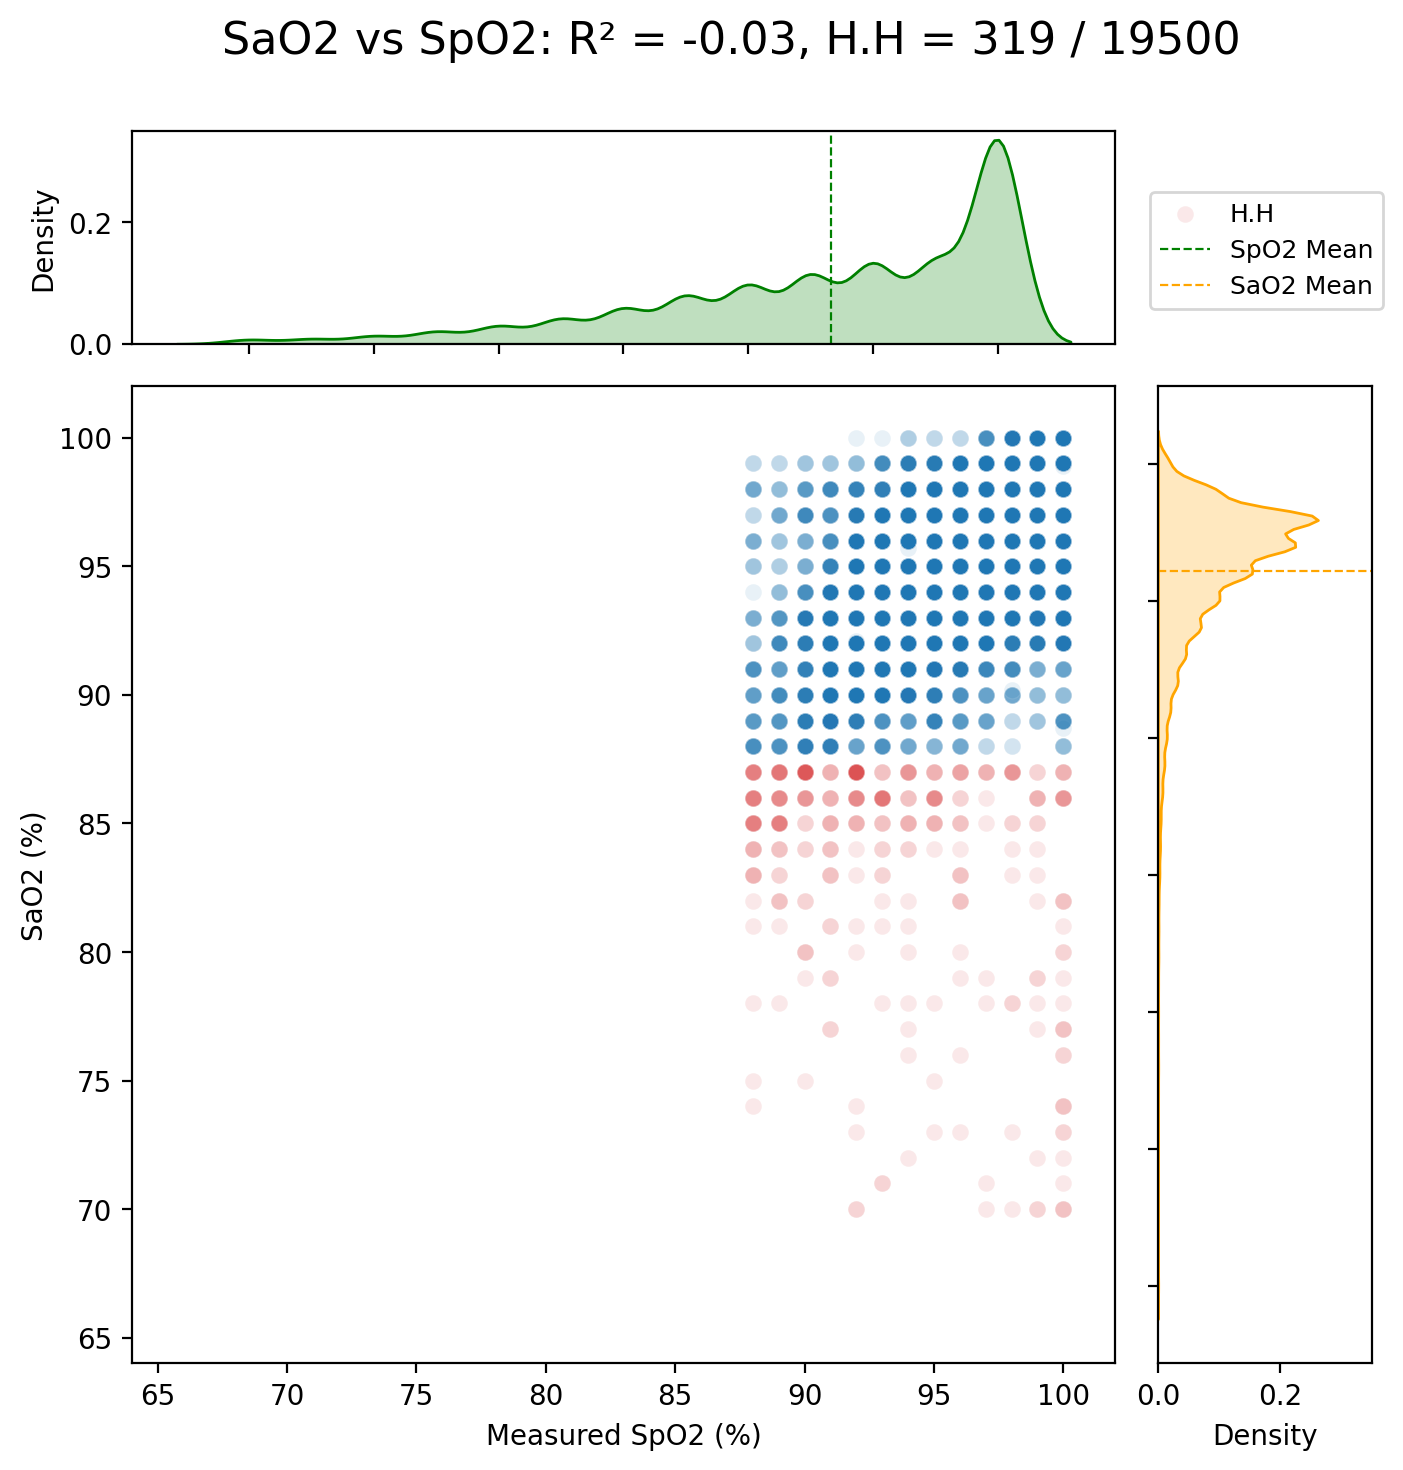

In [ ]:
sao2_spo2_plot(data_3, SaO2_HH=88, SpO2_HH=88, lbl_text="Measured")

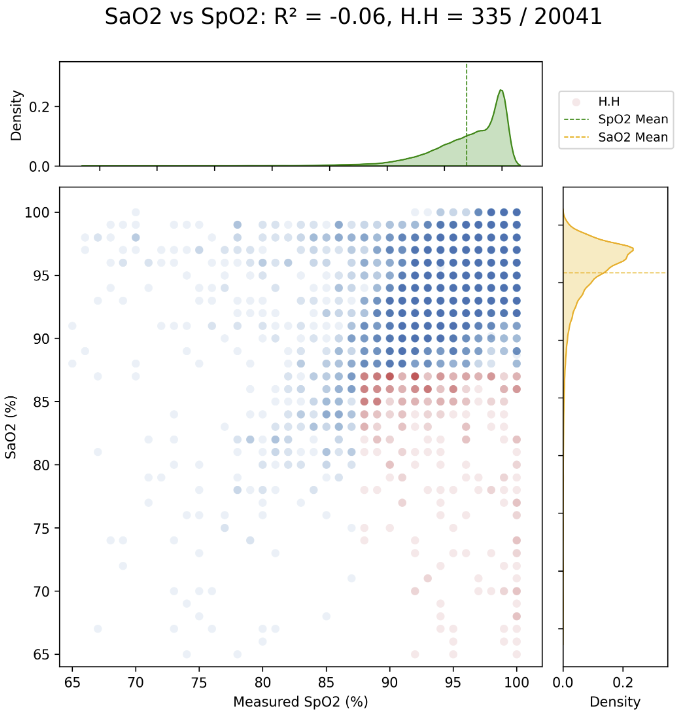

#### Measurements Distributions

In [ ]:
def sao2_spo2_dists(data, races):

  fig, ax = plt.subplots(len(races), 1, sharex= True, sharey=True,
                        figsize=(2 * len(races), 5))

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SaO2, ax=ax[i],
                  color='orange', fill=True, label="SaO2")
      sns.kdeplot(x=data[data.race_group == r].SpO2, ax=ax[i],
                  color='green', fill=True, label="SpO2")
      ax[i].set_xlim([90,100])
      ax[i].legend(loc='upper left', ncol=1, fontsize=9)
      ax[i].set_xlabel('O2 Saturation (%)')
      ax[i].set_title(f'{r} Patients')

  fig.suptitle('SaO2 and SpO2 Density Distributions')
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Encode Race Groups
data_3.race_group2 = data_3.race_group.apply(lambda x: 'Non-White' if x != 'White' \
                                                              else 'White')

races = data_3.race_group2.unique() #["White", "Non-White"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-56-97b4730f04ee>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_3.race_group2 = data_3.race_group.apply(lambda x: 'Non-White' if x != 'White' \


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


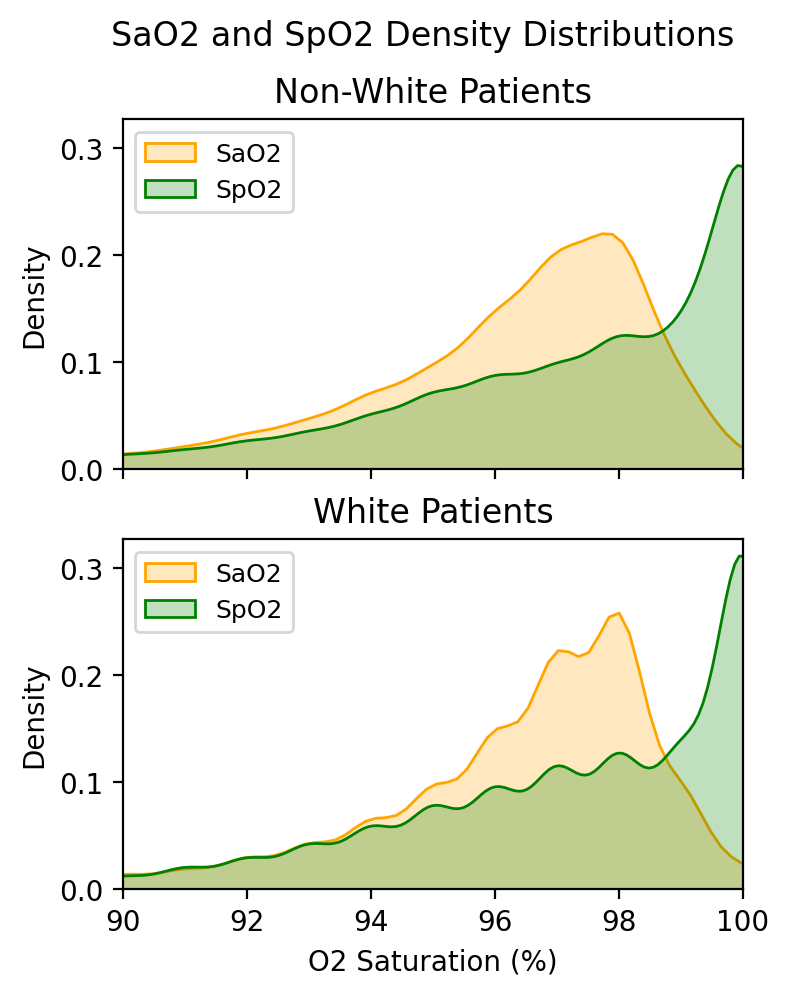

In [ ]:
sao2_spo2_dists(data_3, races)

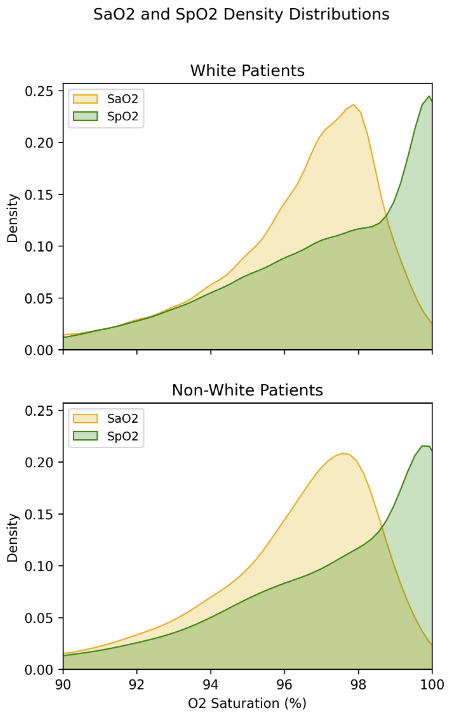

#### Gap Distributions

In [ ]:
def sao2_spo2_gap(data, races, comparison="White vs. Non-White"):

  fig, ax = plt.subplots(1, 1, sharex= True, sharey=True, figsize=(8,4))

  colors = ['green', 'black']

  for i, r in enumerate(races):

      sns.kdeplot(x=data[data.race_group == r].SpO2 - data[data.race_group == r].SaO2,
                  ax=ax, color=colors[i], fill=True, label=r)
      
  ax.set_xlim([-4,4])
  ax.legend(loc='upper left', ncol=1, fontsize=9)
  ax.set_xlabel('SpO2 - SaO2 (%)')
  ax.set_title(f'SpO2 - SaO2 Gap Distribution, {comparison} Patients')

  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


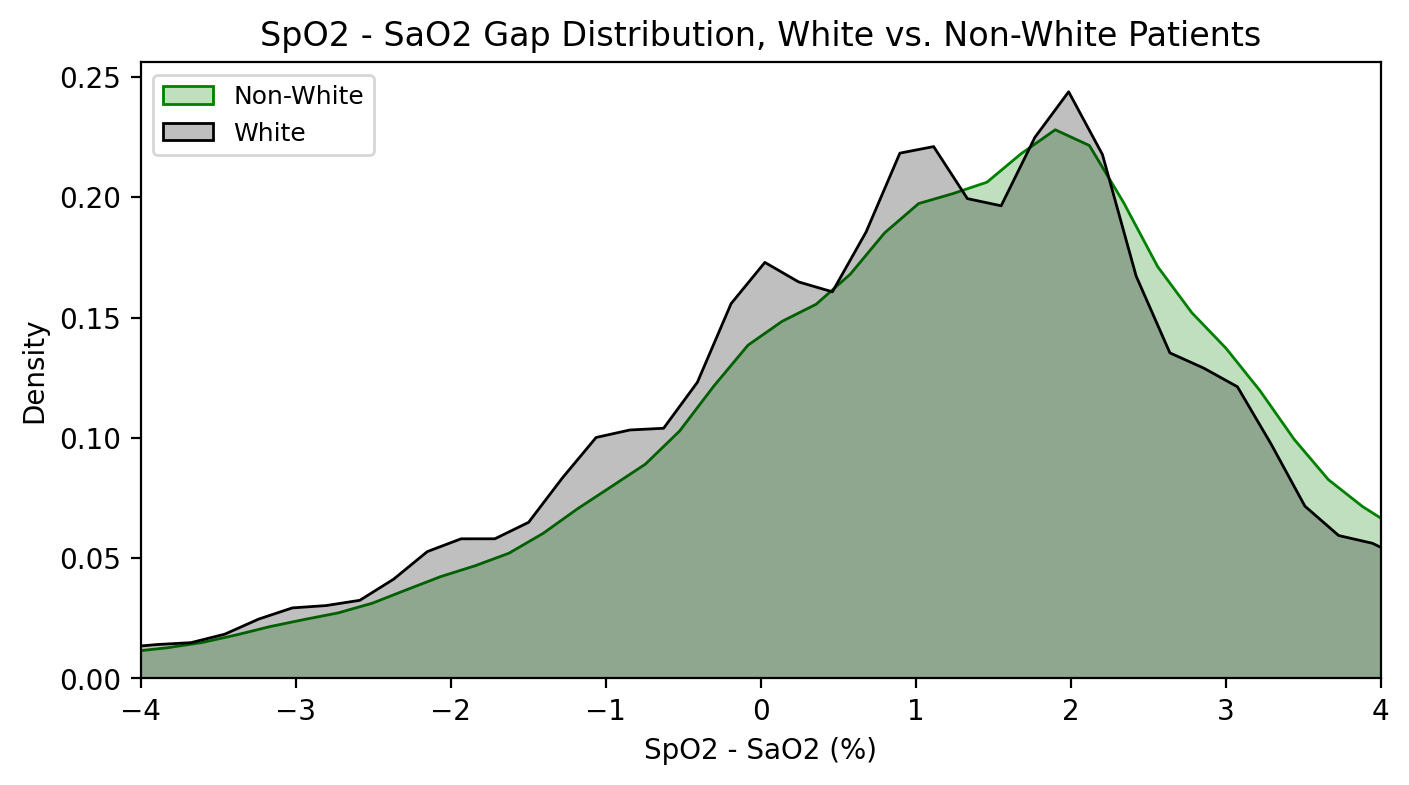

In [ ]:
sao2_spo2_gap(data_3, races, comparison="White vs. Non-White")

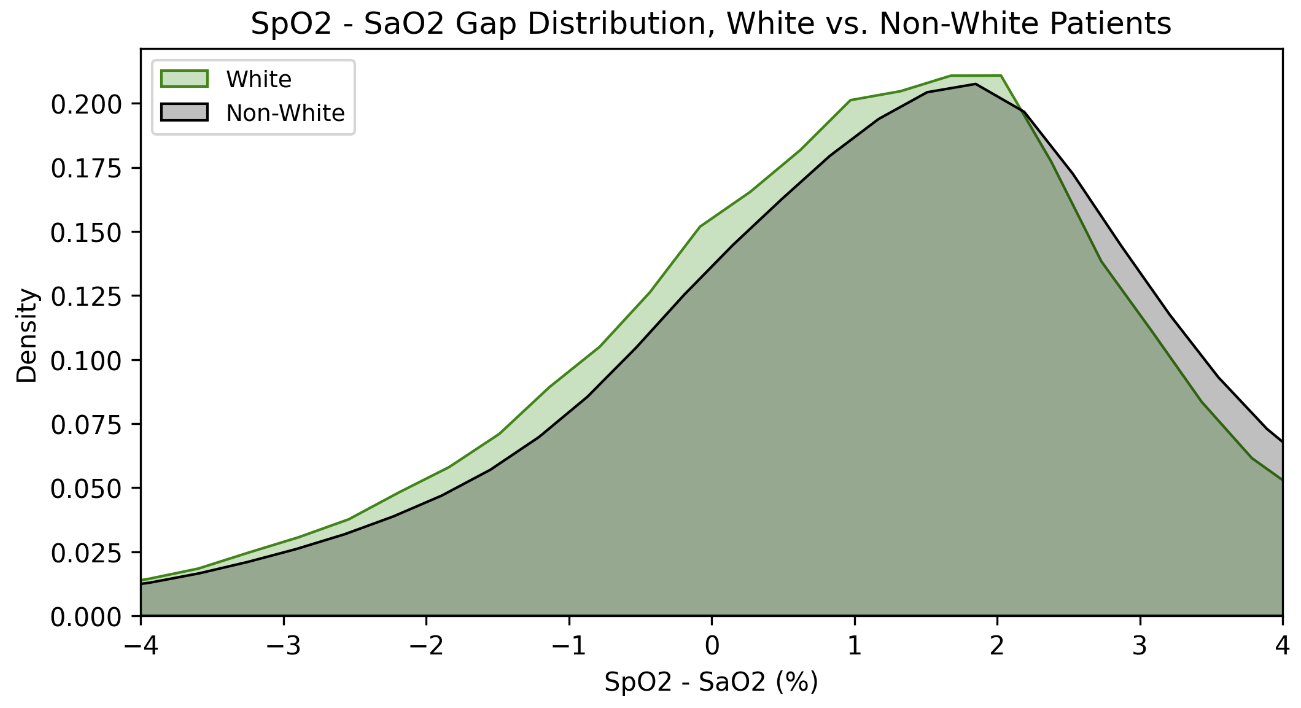

### ✏️ Further EDA
`Create code below to answer the following questions`


*What* is the Outcome Distribution? 

In [ ]:
# Code here!
data_3['SaO2-SpO2'].describe()

count    19500.000000
mean        -1.260482
std          2.639451
min        -30.000000
25%         -2.000000
50%         -1.000000
75%          0.000000
max         11.000000
Name: SaO2-SpO2, dtype: float64

Is it more pronounced across certain groups?

In [ ]:
# Code here!

Add Other Questions that may be relevant

In [ ]:
# Code here!

In [ ]:
# Code here!

In [ ]:
data_3['HH_study'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    19181
1      319
Name: HH_study, dtype: int64

## 4. ML Task Definition

​
**We suggest (but not limited to), 4 possible ML tasks:**

* Hidden Hypoxemia Prediction (Classification)
* $SaO_2$ Prediction (Regression)
* $SaO_2 - SpO_2$ Gap Prediction (Regresion)
* $SaO_2 - SpO_2$ Gap Magnitude Prediction (Classification)

Discuss, as a team:

* Which task yields more value to tackle the presented problem?

* Which task is more prone to errors or biases?

* Where do we have more information?

* Where is there more outcome imbalance?
(HH) 
* Which decision-support algorithm would not harm patients further?

* How will the evaluation be done if we pick a certain task?

* Can we solve more than one task at once?


**Keep in mind that there is no right answer!**
​

### ✏️ Pick one!

`Pick one, or suggest your own:`